# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Show (Poissonian) uncertainty for each histogram value, and overplot the
true distribution. 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

### Some useful definitions and functions

In [6]:
import numpy as np
from scipy import stats
import scipy
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=False)
%matplotlib inline

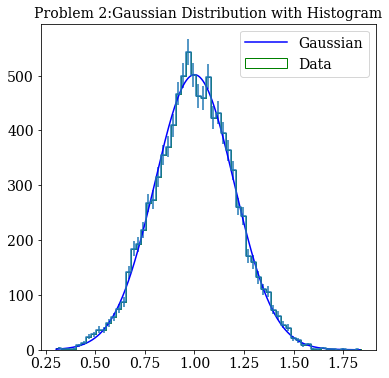

In [25]:
# Problem 2
# Generate a sample of 10,000 data values drawn from N( μ=1.0,  σ=0.2) and draw a pretty histogram, 
# ... with the bin size determined using the Freedman-Diaconis rule. Show (Poissonian) uncertainty for each 
# ... histogram value, and overplot the true distribution.

# I believe this is generating a random set of data from 0 to 2 with 10000 data points.
# I am then setting the average and std values.
# My intuition, however, tells me that this particular method does NOT produce RANDOM data but instead produces evenly spaced data points.
#x = np.linspace(0,2,10000)
N = 10000
mu = 1.0
sigma = 0.2
# dist = stats.norm(mu,sigma) ... This is giving us some random distribution but the form of it is left undefined. 
# In this context, we want a NORMAL distribution (Gaussian). We therefore use a gaussian function in our coding to 
# force its shape.
Gauss = norm(mu,sigma)
G_x = Gauss.rvs(N)
x = np.linspace(min(G_x),max(G_x),N)

# This will define the amount of space the figure is allowed to encompass. 
plt.figure(figsize=(6,6))
nums, bin_edges, _ = fancyhist(G_x,
                              bins="freedman",
                              histtype="step",
                              color="g",
                              label="Data"
                              )
area = sum(np.diff(bin_edges)*nums)
Normal_Gauss = Gauss.pdf(x)*area
plt.plot(x,
        Normal_Gauss,
        color = "b",
        label = "Gaussian"
        )

center_b = (bin_edges[1:]+bin_edges[:-1])*0.5
plt.errorbar(center_b,
            nums,
            yerr=nums**0.5,
            marker="",
            drawstyle="steps-mid"
            )

plt.title("Problem 2:Gaussian Distribution with Histogram")
plt.legend()
plt.show()

# x = np.random.random(N) ... This is incorrect. We need to base this off of our gaussian sample.

# This is defining the quartiles and the subsequent interquartile range multipled by .74 for some reason that is unclear.
#q25 = np.percentile(x,25)
#q75 = np.percentile(x,75)
#sigmaG = 0.7413*(q75-q25)
# This binsize calculation is following the Freedman-Diaconis rule.
#binsize = (2.7*sigmaG)/(N**(1./3))
# This is filling an array of bins.
#bins = np.append(np.arange(start=x.min(),stop=x.max(),step=binsize),x.max())
# print(q25)
# print(q75)
# print(len(bins))
# print(bins)

# This is plotting a normal historgram based on the data entered.
#_ = plt.hist(x,bins=bins,histtype="step",normed=True)


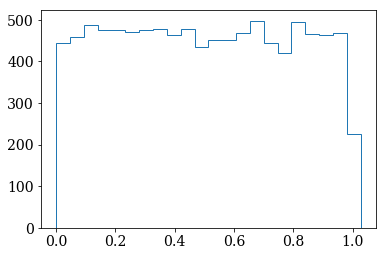

In [42]:
# This is a continuation of Problem 2. 
# I produced this histogram because I believe it forces the histogram to follow Freedman rules.
# This is, presumably, an easier way to generate what was calculated above. 
from astroML.plotting import hist as fancyhist
_ = fancyhist(x,bins="freedman", histtype="step")

## This is incorrect. Corrections are above. 

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

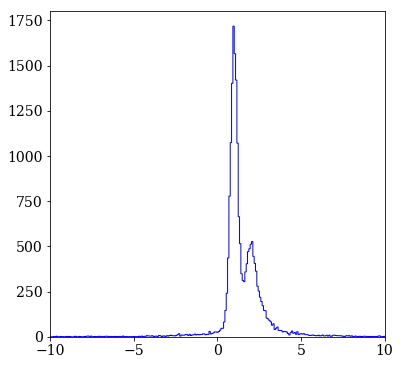

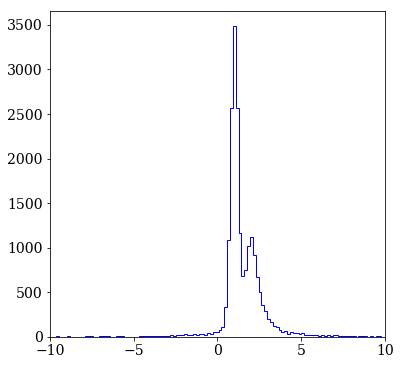

In [32]:
# Problem 3
# Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with np.concatenate()) 
# ... another sample of 10,000 data values drawn from a cauchy distribution with  μ=2.0 and  γ=0.5. 
# ... Do it twice: once with the bin size determined using the Freedman-Diaconis rule and once using the Scott's rule. 
# ... Comment.

mu = 2.0
gamma = 0.5

cauchy_dist = cauchy(mu,gamma)

C_x = cauchy_dist.rvs(N)

Gauss_Cauchy = np.concatenate((G_x,C_x))
plt.figure(figsize=(6,6))
nums, bin_edges, _ = fancyhist(Gauss_Cauchy,
                              bins="freedman",
                              histtype="step",
                              color="b",
                              label = "Data"
                              )

plt.xlim(-10,10)
plt.show()

plt.figure(figsize=(6,6))
nums, bin_edges, _ = fancyhist(Gauss_Cauchy,
                              bins="scott",
                              histtype="step",
                              range=(-10,10),
                              color="b",
                              label = "Data"
                              )

plt.xlim(-10,10)
plt.show()

# Scott's rule bases bin sizes off of all data points meaning if there are outliers it will base its bin sizes off of those. 
# In this case that led to very large bin sizes. This is why we included the range function in order to cut off what
# data points we were allowing it to consider. It's as if it carried out all of the necessary math without looking at anything past 
# 10 or anything less than -10.


# I'm copying this array from our in class work but I have no idea where it is generated from. Presumably it needs
# ... to be re-generated for each specicic case. 

# These next two were from class but are not useful here. 
# mu_gamma_f = [(5, 1.0, 0.1),
             # (7, 0.5, 0.5),
             # (9, 0.1, 0.1),
             # (12, 0.5, 0.2),
             # (14, 1.0, 0.1)]

#x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N))
                   # for (mu, gamma, f) in mu_gamma_f])

# This was an attempt at changing the x-axis range. It worked but did not fix the underlying issue.
# plt.xlim((-100,100))

#from astroML.plotting import hist as fancyhist
#_ = fancyhist(x, bins="scott", histtype="step")
#_ = fancyhist(x, bins="freedman", histtype="step")

# This is defining the standard deviation of the data.
#s = np.std(x)
#print(s)

# This is defining the uncertainty. 
# I need to figure out how to calculate the uncertainty for each histogram value.
#sig_x = s/(np.sqrt(N))
#unc_x = s/(np.sqrt(2*(N-1)))

#print(unc_x)

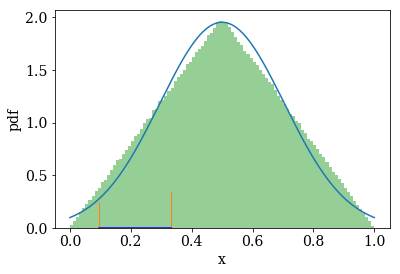

In [10]:
# Problem 4
# Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 
# ... 1,000,000  𝒩(0,1)draws of  χ2 for N=2 and N=5. Overplot the theoretical pdf (it will help to use 
# ... scipy.special.gamma()).
# I think the gamma part will come into play when you're overlaying this with a T PDF. 

# This will be useful for homework!
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

N=2 # Number of draws
mu=0.5 # Location
sigma =1.0/np.sqrt(12)/np.sqrt(N)  # Scale factor

u = np.linspace(0,1,1000) # Array to sample the space
dist = stats.norm(mu,sigma) # Complete
plt.plot(u,dist.pdf(u)) # Complete

x = np.random.random(N)# N random draws
plt.plot(x, x**2, '|', markersize=50)
plt.xlabel('x')
plt.ylabel('pdf')

Gamma = scipy.special.gamma(x**2)

plt.plot(x,
        dist.pdf(Gamma),
        color = "b",
        label = "Gamma"
        )


# Add a histogram that is the mean of 1,000,000 draws
yy = []
for i in np.arange(1000000):
    xx = np.random.random(N) # N random draws
    yy.append(xx.mean()) # Append average of those random draws to the end of the array

_ = plt.hist(yy,bins=100,histtype='stepfilled', alpha=0.5, normed=True)

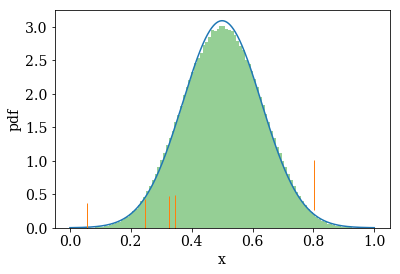

In [3]:
# Problem 4; N = 5

# This will be useful for homework!
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

N=5 # Number of draws
mu=0.5 # Location
sigma =1.0/np.sqrt(12)/np.sqrt(N)  # Scale factor

u = np.linspace(0,1,1000) # Array to sample the space
dist = stats.norm(mu,sigma) # Complete
plt.plot(u,dist.pdf(u)) # Complete

x = np.random.random(N) # N random draws
plt.plot(x, x**2, '|', markersize=50)
plt.xlabel('x')
plt.ylabel('pdf')



# Add a histogram that is the mean of 1,000,000 draws
yy = []
for i in np.arange(1000000):
    xx = np.random.random(N) # N random draws
    yy.append(xx.mean()) # Append average of those random draws to the end of the array

_ = plt.hist(yy,bins=100,histtype='stepfilled', alpha=0.5, normed=True)